In [1]:
# import pymeshlab
# ms = pymeshlab.MeshSet()
# ms.load_new_mesh('datasets/dragon_vrip.ply')
# ms.generate_sampling_clustered_vertex(threshold = pymeshlab.PercentageValue(4.869516))
# sampled_500 = ms.current_mesh()
# print(f"Number of vertices in the sampled dataset: {len(sampled_500.vertex_matrix())}")

In [1]:
import numpy as np
import pickle
import os
import glob
from plyfile import PlyData
import src.utils as utils

# data = PlyData.read('datasets/dragon_vrip.ply')
# # convert numpy array of vertex 3-tuples to a numpy array of shape (N, 3)
# print(f"Number of vertices in the dataset: {len(data['vertex'].data)}")

# vertices = np.array([list(vertex) for vertex in data['vertex'].data])
# vertices_diameter = np.max(vertices[:, 2]) - np.min(vertices[:, 2])
# print(f"vertex diameter: {vertices_diameter}")
# #save vertices on disk
# np.save('datasets/dragon_vrip_vertices.npy', vertices)

# rng = np.random.default_rng()
# sample_sizes = range(500, 4000 + 500, 500)  # Sample sizes from 500 to 4000 in steps of 500
# # sampled_data = {}

# # # Delete previously created sampled files
# # for file in glob.glob('datasets/dragon_[0-9]*.npy'):
# #     os.remove(file)

# # for size in sample_sizes:
# #     sampled_data[f'sampled_{size}'] = rng.choice(vertices, size, replace=False)
# #     np.save(f'datasets/dragon_{size}.npy', sampled_data[f'sampled_{size}'])

max_dimension = 3  # Maximum dimension for the simplicial complex
complex_res = {}
# for size in sample_sizes:
#     sample = rng.choice(vertices, size, replace=False)
#     # print(f"\nPROCESSING DRAGON {size} WITH {len(sample)} POINTS")
#     max_edge_length = utils.estimate_max_edge_length(sample)
#     complex_res[f"dragon {size}"] = utils.create_complexes(point_cloud=sample, max_edge_length=max_edge_length, max_dimension=max_dimension)

# Load sampled datasets
sampled_datasets = {}
for file in glob.glob('datasets/dragon_ply/sampled_*.ply'):
    data = PlyData.read(file)
    points = np.array([list(vertex) for vertex in data['vertex'].data])
    sample = points[:, :3]  # Use only the first three columns (x, y, z)
    # print(f"\nPROCESSING {file} WITH {len(sample)} POINTS")
    sampled_datasets[f"dragon {len(sample)}"] = sample
    # min_distances, max_min_distance, mean_min_dist, median_min_dist = utils.calculate_distance(sample)
    # print(f"Max-Min distance for {file}: {max_min_distance}")
    # max_edge_length = median_min_dist * 2
    complex_res[f"dragon {len(sample)}"] = utils.create_complexes(point_cloud=sample, max_dimension=max_dimension)

# order the complexes by number of points
complex_res = dict(sorted(complex_res.items(), key=lambda item: len(sampled_datasets[item[0]])))
#check order
for name, result in complex_res.items():
    print(f"Complex '{name}' has {len(sampled_datasets[name])} points.")

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Save complex_res to disk
with open('results/dragon_complexes.pkl', 'wb') as f:
    pickle.dump(complex_res, f)
print(f"\nSaved complexes for {len(complex_res)} samples to 'results/dragon_complexes.pkl'")

Calculating pairwise distances...

Using adaptive parameters:
  Rips edge length: 0.022382
  Alpha max value: 0.010330 (alpha²=0.000107)
  Cech max value: 0.010330 (alpha²=0.000107)
  Witness max value: 0.020660 (alpha²=0.000427)
Calculating pairwise distances...

Using adaptive parameters:
  Rips edge length: 0.016641
  Alpha max value: 0.007680 (alpha²=0.000059)
  Cech max value: 0.007680 (alpha²=0.000059)
  Witness max value: 0.015361 (alpha²=0.000236)
Calculating pairwise distances...

Using adaptive parameters:
  Rips edge length: 0.009762
  Alpha max value: 0.004505 (alpha²=0.000020)
  Cech max value: 0.004505 (alpha²=0.000020)
  Witness max value: 0.009011 (alpha²=0.000081)
Calculating pairwise distances...

Using adaptive parameters:
  Rips edge length: 0.008551
  Alpha max value: 0.003947 (alpha²=0.000016)
  Cech max value: 0.003947 (alpha²=0.000016)
  Witness max value: 0.007894 (alpha²=0.000062)
Calculating pairwise distances...

Using adaptive parameters:
  Rips edge length

In [3]:
utils.print_performance_table(complex_res)


PERFORMANCE SUMMARY TABLE
Sample         Rips              Cech              Delaunay Cech     Alpha             Delaunay Alpha    Witness           Relaxed Witness   Strong Witness    
------------------------------------------------------------------------------------------------------------------------------------------------------------
PROCESSING TIME (s)
------------------------------------------------------------------------------------------------------------------------------------------------------------
dragon 500     0.008             0.012             0.013             0.014             0.016             0.002             0.006             0.002             
dragon 1000    0.018             0.025             0.028             0.030             0.034             0.005             0.013             0.005             
dragon 1501    0.027             0.036             0.043             0.049             0.059             0.009             0.019             0.008             

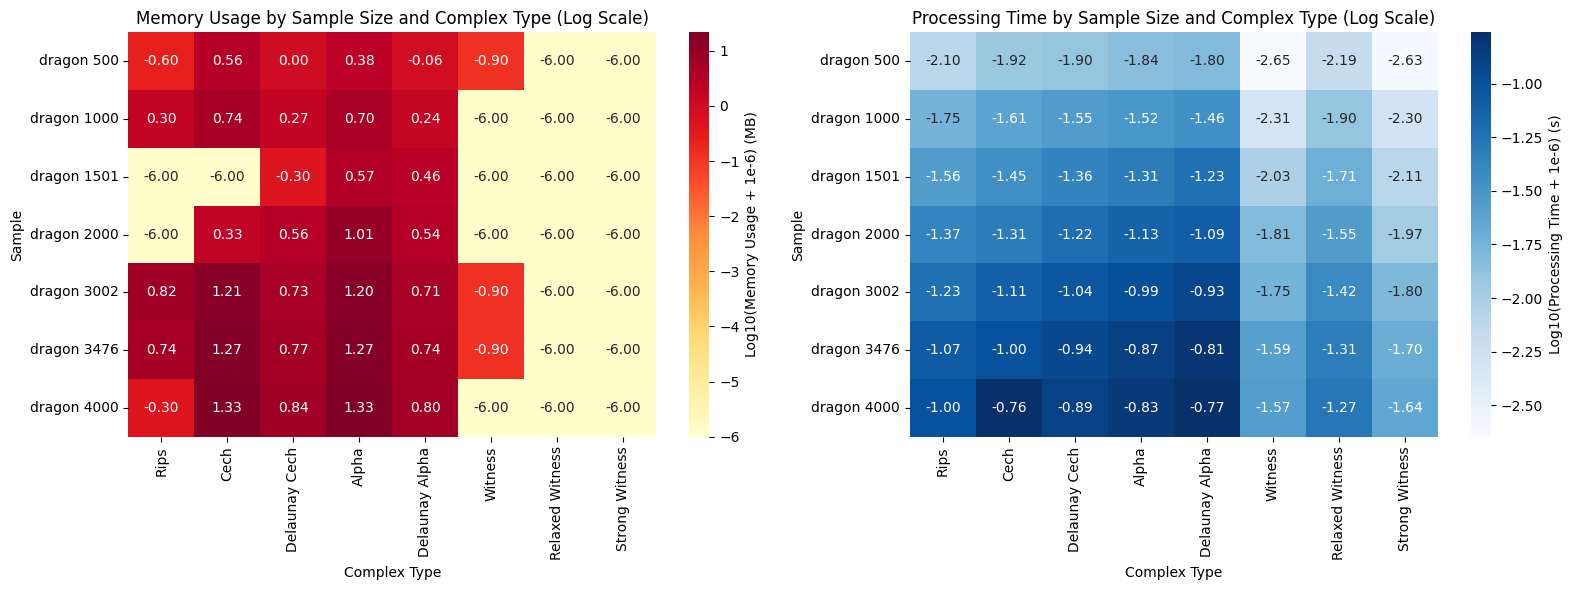


Original Memory Usage Statistics (MB):
           Rips       Cech  Delaunay Cech      Alpha  Delaunay Alpha  \
count  7.000000   7.000000       7.000000   7.000000        7.000000   
mean   2.125000   9.625000       3.589286  11.053571        3.714286   
std    2.794153   8.780305       2.529734   7.722686        2.038323   
min    0.000000   0.000000       0.500000   2.375000        0.875000   
25%    0.125000   2.875000       1.437500   4.375000        2.312500   
50%    0.500000   5.500000       3.625000  10.125000        3.500000   
75%    3.750000  17.437500       5.625000  17.250000        5.312500   
max    6.625000  21.250000       6.875000  21.625000        6.375000   

        Witness  Relaxed Witness  Strong Witness  
count  7.000000              7.0             7.0  
mean   0.053571              0.0             0.0  
std    0.066815              0.0             0.0  
min    0.000000              0.0             0.0  
25%    0.000000              0.0             0.0  
50%  

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract data for heatmaps
sample_names = list(complex_res.keys())
complex_types = list(complex_res[sample_names[0]].keys())

# Create matrices for memory and time data
memory_data = []
time_data = []

for sample in sample_names:
    memory_row = []
    time_row = []
    for complex_type in complex_types:
        memory_row.append(complex_res[sample][complex_type].memory_usage_mb)
        time_row.append(complex_res[sample][complex_type].processing_time_s)
    memory_data.append(memory_row)
    time_data.append(time_row)

# Convert to DataFrames for easier plotting
memory_df = pd.DataFrame(memory_data, 
                        index=sample_names, 
                        columns=[ct.replace('_', ' ').title() for ct in complex_types])
time_df = pd.DataFrame(time_data, 
                      index=sample_names, 
                      columns=[ct.replace('_', ' ').title() for ct in complex_types])

# Apply logarithmic transformation (add small value to avoid log(0))
log_memory_df = np.log10(memory_df + 1e-6)
log_time_df = np.log10(time_df + 1e-6)

# Create heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Memory usage heatmap (logarithmic)
sns.heatmap(log_memory_df, annot=True, fmt='.2f', cmap='YlOrRd', 
            ax=ax1, cbar_kws={'label': 'Log10(Memory Usage + 1e-6) (MB)'})
ax1.set_title('Memory Usage by Sample Size and Complex Type (Log Scale)')
ax1.set_xlabel('Complex Type')
ax1.set_ylabel('Sample')

# Processing time heatmap (logarithmic)
sns.heatmap(log_time_df, annot=True, fmt='.2f', cmap='Blues', 
            ax=ax2, cbar_kws={'label': 'Log10(Processing Time + 1e-6) (s)'})
ax2.set_title('Processing Time by Sample Size and Complex Type (Log Scale)')
ax2.set_xlabel('Complex Type')
ax2.set_ylabel('Sample')

plt.tight_layout()
plt.show()

# Print summary statistics for original and log-transformed data
print("\nOriginal Memory Usage Statistics (MB):")
print(memory_df.describe())
print("\nLog10 Memory Usage Statistics:")
print(log_memory_df.describe())

print("\nOriginal Processing Time Statistics (s):")
print(time_df.describe())
print("\nLog10 Processing Time Statistics:")
print(log_time_df.describe())